# Summary

The geomorphic fundamental "metric" function $\mathcal{F}^*$ prescribes the distance traveled by an erosion front in unit time. It takes the form (for the bedrock channel SPIM model) of power functions of the surface-normal erosion slowness covector components $\mathbf{p} = [p_x, p_z]$ multiplied by a position dependent rate variable $\varphi(\mathbf{r})$. This kind of fundamental function is called a generalized Kropina metric on $\mathsf{T}^*\mathsf{M}$. This canonical metric is one of the family of so-called $(\alpha^*,\beta^*)$ Finsler (Cartan) metrics that, when defined on the cotangent manifold indicated by the $*$ annotation, combine a contravariant Riemannian metric tensor $a^{ij}$ with a vector field $b^i$ (the equivalent on the tangent manifold employs a 1-form $b_i$ along with a covariant metric tensor $a_{ij}$). In this geomorphic case, the Riemannian tensor is just the Euclidean metric tensor scaled by $\sqrt{\varphi(\mathbf{r})}$, while the vector field is simply ${\varphi(\mathbf{r})}$ applied to the horizontal unit vector.

In [10]:
import sympy as sy, numpy as np, os

sy.init_printing(pretty_print=True, wrap_line=True)
from sympy import simplify, expand, factor, Eq, Abs, Rational, sqrt, symbols
from gme.core.equations import Equations
from gme.core.symbols import eta, astar_riem, bstar_vec, varphi_r, rvec, px, pz


In [11]:
gmeq = Equations(eta_=Rational(1,2),  
                 mu_=Rational(1,4),
                 beta_type='sin', 
                 do_raw=True )

# Fundamental function

The co-Finsler/Cartan fundamental function for the geomorphic (SPIM) Hamiltonian, derived from first principles, is:

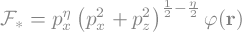

In [12]:
gmeq.Fstar_eqn

For a gradient-scaling exponent of $\eta=\tfrac{1}{2}$ in the SPIM, we have

In [13]:
gmeq.Fstar_eqn.subs({eta:Rational(1,2)})

while for a gradient-scaling exponent of $\eta=\tfrac{3}{2}$ in the SPIM, we have

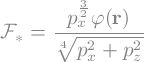

In [14]:
gmeq.Fstar_eqn.subs({eta:Rational(3,2)}) 

# Conversion to generalized Kropina form

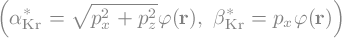

In [15]:
astar_eqn = Eq(astar_riem, varphi_r(rvec)*sqrt(px**2+pz**2) )
bstar_eqn = Eq(bstar_vec, (varphi_r(rvec)*px) )
astar_eqn, bstar_eqn

So we have the components of an $(\alpha, \beta)$ metric [Matsumoto, 1992] on our Cartan/co-Finsler space, i.e., on $\mathsf{T}^*\mathsf{M}$,
where
\begin{equation}
    \alpha^*_{\mathrm{Kr}} = \left( a^{ij}(\mathbf{r})\, p_i\, p_j \right)^{\frac{1}{2}}
    ,\quad
    \beta^*_{\mathrm{Kr}} = p_i b^i(\mathbf{r})
\end{equation}


The Riemannian component $a^{ij}$ is just a Euclidean metric tensor
\begin{equation}
    a^{ij}(\mathbf{r}) 
    =
    {\varphi^2(\mathbf{r})}
    \begin{bmatrix}
        1 & 0 \\
        0 & 1
    \end{bmatrix}
\end{equation}

and the vector field component $b^i$ (the dual of what would be a 1-form for an $(\alpha, \beta)$ metric on a Finsler space, i.e., on $\mathsf{T}\mathsf{M}$) is
\begin{equation}
    b^{i}(\mathbf{r}) 
    =
    {\varphi(\mathbf{r})}
    \begin{bmatrix}
        1 \\
        0
    \end{bmatrix}
\end{equation}

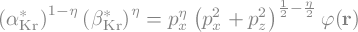

In [16]:
abstar_eqn = Eq(
    astar_eqn.lhs**(1-eta) * (bstar_eqn.lhs)**eta , 
    simplify(expand( astar_eqn.rhs**(1-eta) * (bstar_eqn.rhs)**eta ))
    )
abstar_eqn

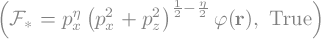

In [17]:
gmeq.Fstar_eqn, Eq(abstar_eqn.rhs, gmeq.Fstar_eqn.rhs)

Therefore $F^*$ is a generalized $m$-Kropina metric on the co-Finsler (Cartan) space, which has the standard form:

\begin{equation}
    F^* = \alpha^{m+1} \beta^{-m}
\end{equation}
where $m:=-\eta$, with the constraint that $m \neq 0, -1$, and where $\alpha := \alpha^*_\mathrm{Kr}$ and  $\beta:=\beta^*_\mathrm{Kr}$ (don't confuse these $\alpha$, $\beta$ with the ray and surface tilt angles).

For $\eta=\tfrac{1}{2}$, we have a generalized $\left(-\tfrac{1}{2}\right)$-Kropina metric function $F^* = \alpha^{1/2} \beta^{1/2}$.

For $\eta=\tfrac{3}{2}$, we have a generalized $\left(-\tfrac{3}{2}\right)$-Kropina metric function $F^* = \alpha^{-1/2} \beta^{3/2}$.

For $\eta=1$, the metric function is ill-defined.

Note: the canonical Kropina metric is usually used to describe $F$ not $F^*$, but not exclusively.

# References

[Antonelli, P. L., Ingarden, R. S., & Matsumoto, M. (1993). The theory of sprays and Finsler spaces with applications in physics and biology. Dordrecht: Springer-Science+Business Media, B.Y.](http://doi.org/10.1007/978-94-015-8194-3) – see chapter 1.4.

[Hrimiuc, D., & Shimada, H. (1996). On the  $\mathcal{L}$-duality between Lagrange and Hamilton manifolds. Nonlinear World, 3, 613–641.](https://www.researchgate.net/publication/265953429_On_the_L-duality_between_Lagrange_and_Hamilton_manifolds)

[Hrimiuc, D., & Shimada, H. (1997). On some special problems concerning the $\mathscr{L}$-duality between Finsler and Cartan spaces. Tensor N. S., 58, 48–61.](https://www.researchgate.net/publication/266994467_On_some_special_problems_concerning_the_-duality_between_Finsler_and_Cartan_spaces)

[Kropina, V. K. (1961). On projective two-dimensional Finsler spaces with special metric, 11.](https://arxiv.org/abs/math/0605759)

[Kushwaha, R. S., & Shanker, G. (2018). On the $\mathcal{L}$-duality of a Finsler space with exponential metric $\alpha e^{\beta/\alpha}$. Acta Universitatis Sapientiae, Mathematica, 10(1), 167–177.](http://doi.org/10.2478/ausm-2018-0014)

[Matsumoto, M. (1992). Theory of Finsler spaces with $(\alpha,\beta)$-metric. Reports on Mathematical Physics, 31(1), 43–83.](http://doi.org/10.1016/0034-4877(92)90005-L)

[Miron, R., Hrimiuc, D., Shimada, H., & Sabau, S. V. (2002). The Geometry of Hamilton and Lagrange Spaces. Dordrecht: Springer Science & Business Media. ](http://doi.org/10.1007/0-306-47135-3) – see chapter 6 on "Cartan Spaces", which includes Kropina metrics on $\mathsf{T}^*\mathsf{M}$, and $(\alpha^*, \beta^*)$ metrics

[Sabau, S. V., & Shimada, H. (2001). Classes of Finsler spaces with $(\alpha, \beta)$-metrics. Reports on Mathematical Physics, 41(1), 31–48.](http://doi.org/10.1016/S0034-4877(01)90004-7)

[Shanker, G. (2011). The $\mathcal{L}$-dual of a generalized m-Kropina space. Journal of the Tensor Society, 5, 15–25.](https://tensorsociety.org/the-l-dual-of-a-generalized-m-kropina-space-2/)

